In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install SimpleITK

In [3]:
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/content/drive/MyDrive/Colab Notebooks/render_3d_mask') # Import py files in the folder

from utils.helper import plot_output, generate_3d_sphere
from utils.overlay import FirstHitVoxelMaskProjection, MeanAxisProjector, OverlayMasker

dataset_dir = "/content/drive/MyDrive/Colab Notebooks/render_3d_mask/dataset_samples/"

# Load Brain Image

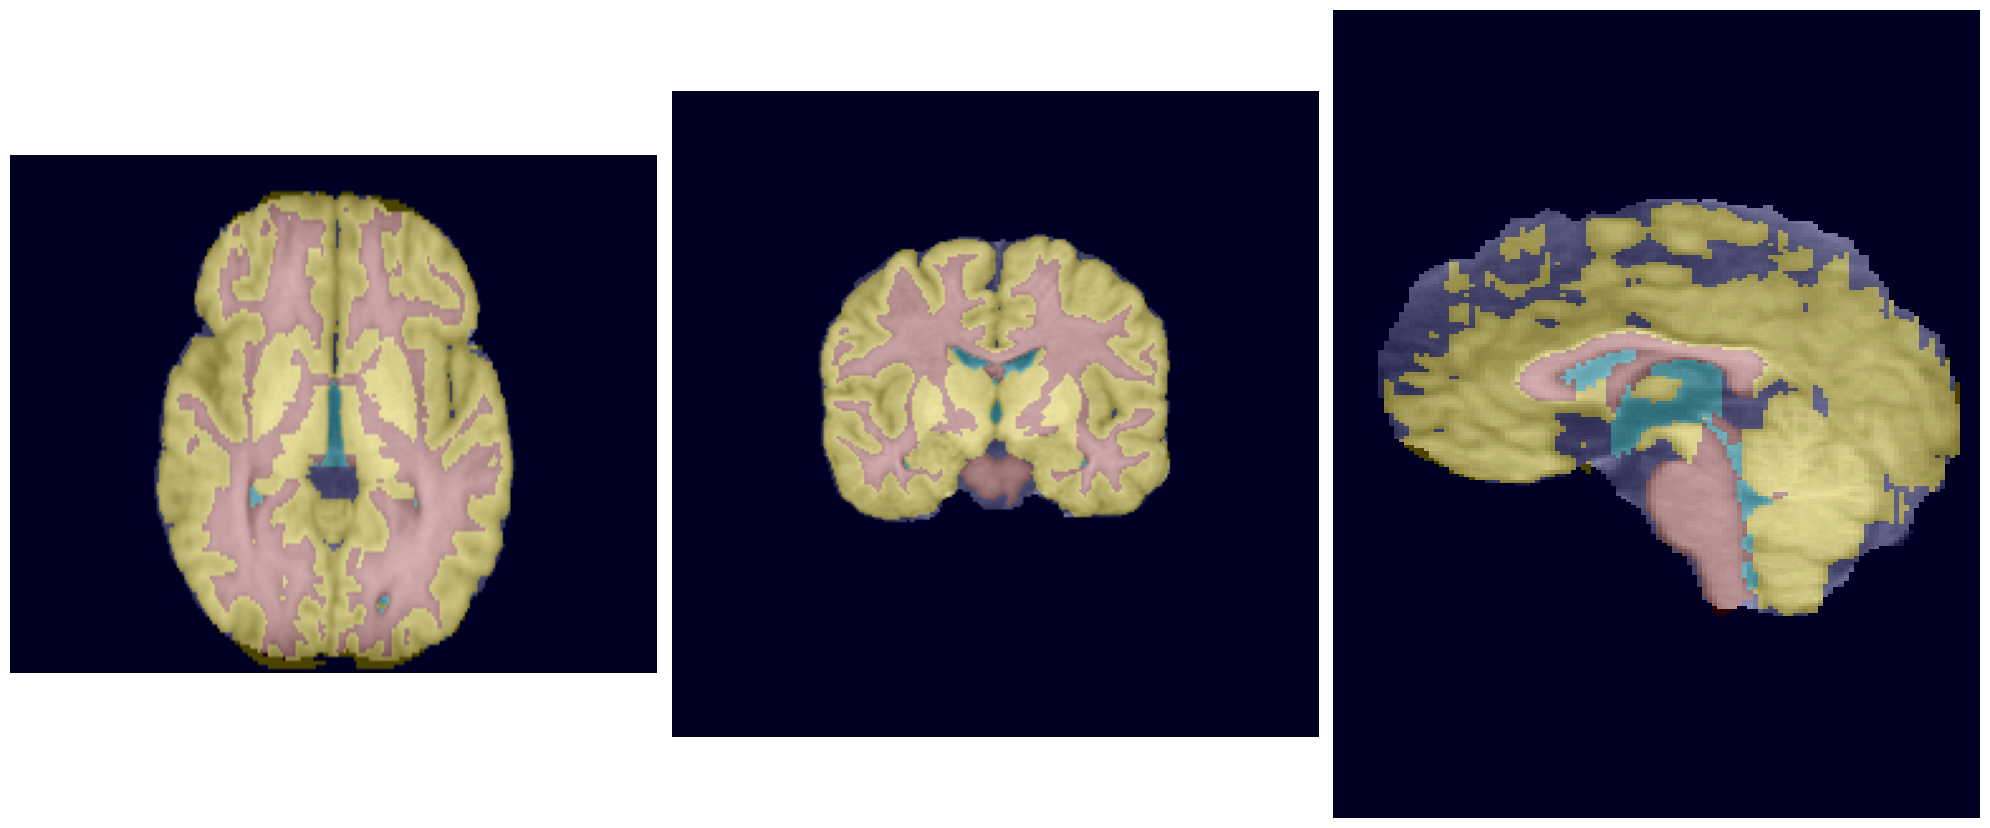

In [4]:
t1_brain_sitk = sitk.ReadImage(f"{dataset_dir}IBSR/IBSR_01.nii.gz")
t1_brain_arr = sitk.GetArrayFromImage(t1_brain_sitk)

brain_mask_sitk = sitk.ReadImage(f"{dataset_dir}IBSR/IBSR_01_seg.nii.gz")
brain_mask_arr = sitk.GetArrayFromImage(brain_mask_sitk)

brain_voxel_spacing = brain_mask_sitk.GetSpacing()

plot_output(t1_brain_arr, brain_mask_arr, mirror_h=True, mirror_v=True, mask_alpha=0.3, spacing=brain_voxel_spacing)

# Load Abdominal Image

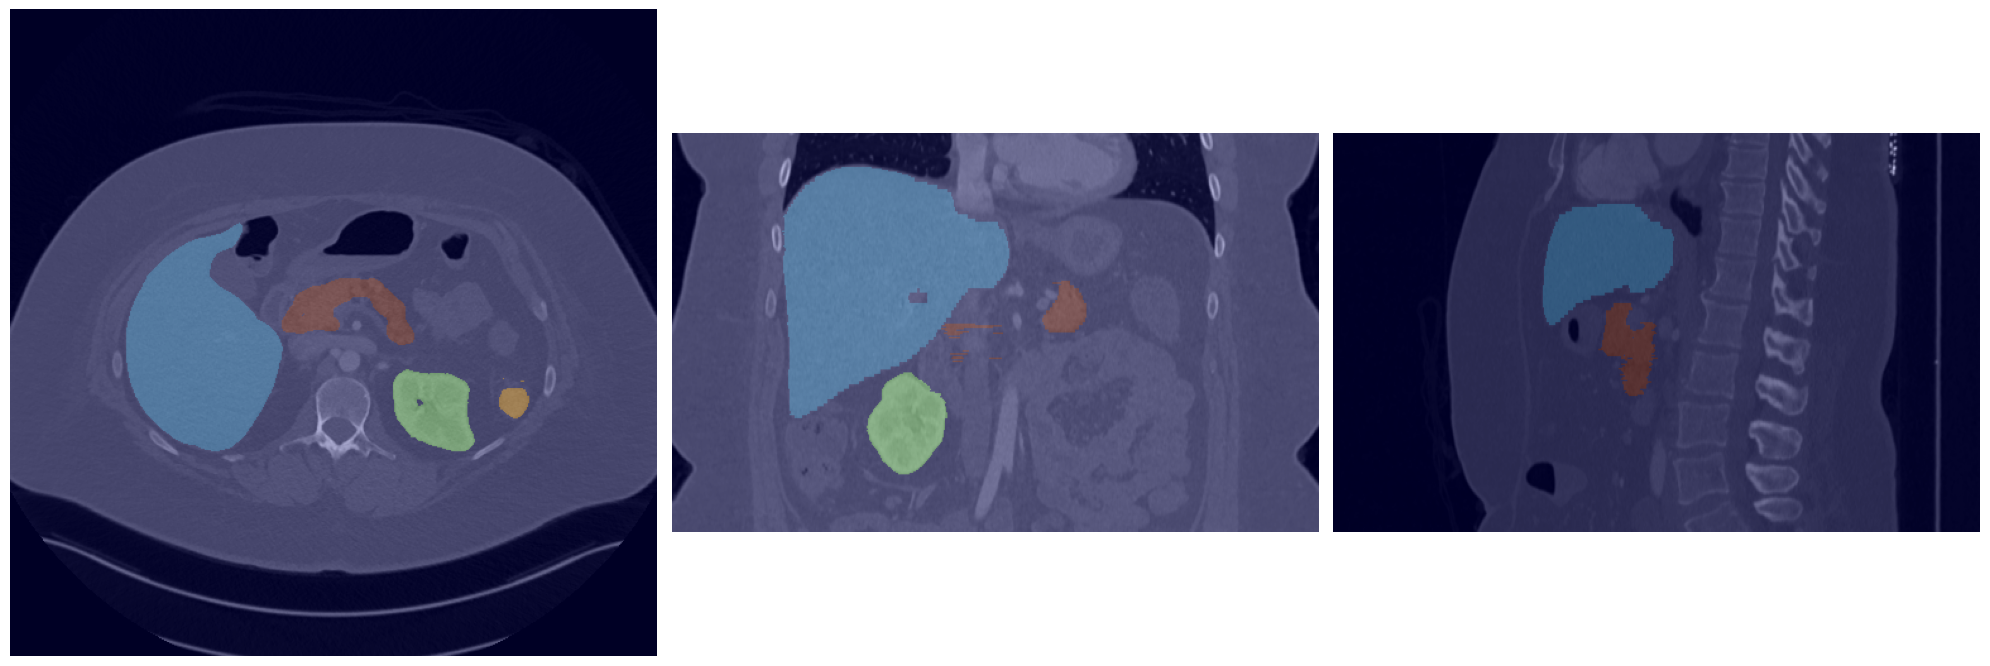

In [5]:
ct_abdomin_sitk = sitk.ReadImage(f"{dataset_dir}AbdomenCT_1K/Case_00001_0000.nii.gz")
ct_abdomin_arr = sitk.GetArrayFromImage(ct_abdomin_sitk)

abdomin_mask_sitk = sitk.ReadImage(f"{dataset_dir}AbdomenCT_1K/Case_00001.nii.gz")
abdomin_mask_arr = sitk.GetArrayFromImage(abdomin_mask_sitk)

abdomin_voxel_spacing = abdomin_mask_sitk.GetSpacing()

plot_output(ct_abdomin_arr, abdomin_mask_arr, mirror_h=True, mirror_v=True, mask_alpha=0.3, spacing=abdomin_voxel_spacing)

# Generate Sphere

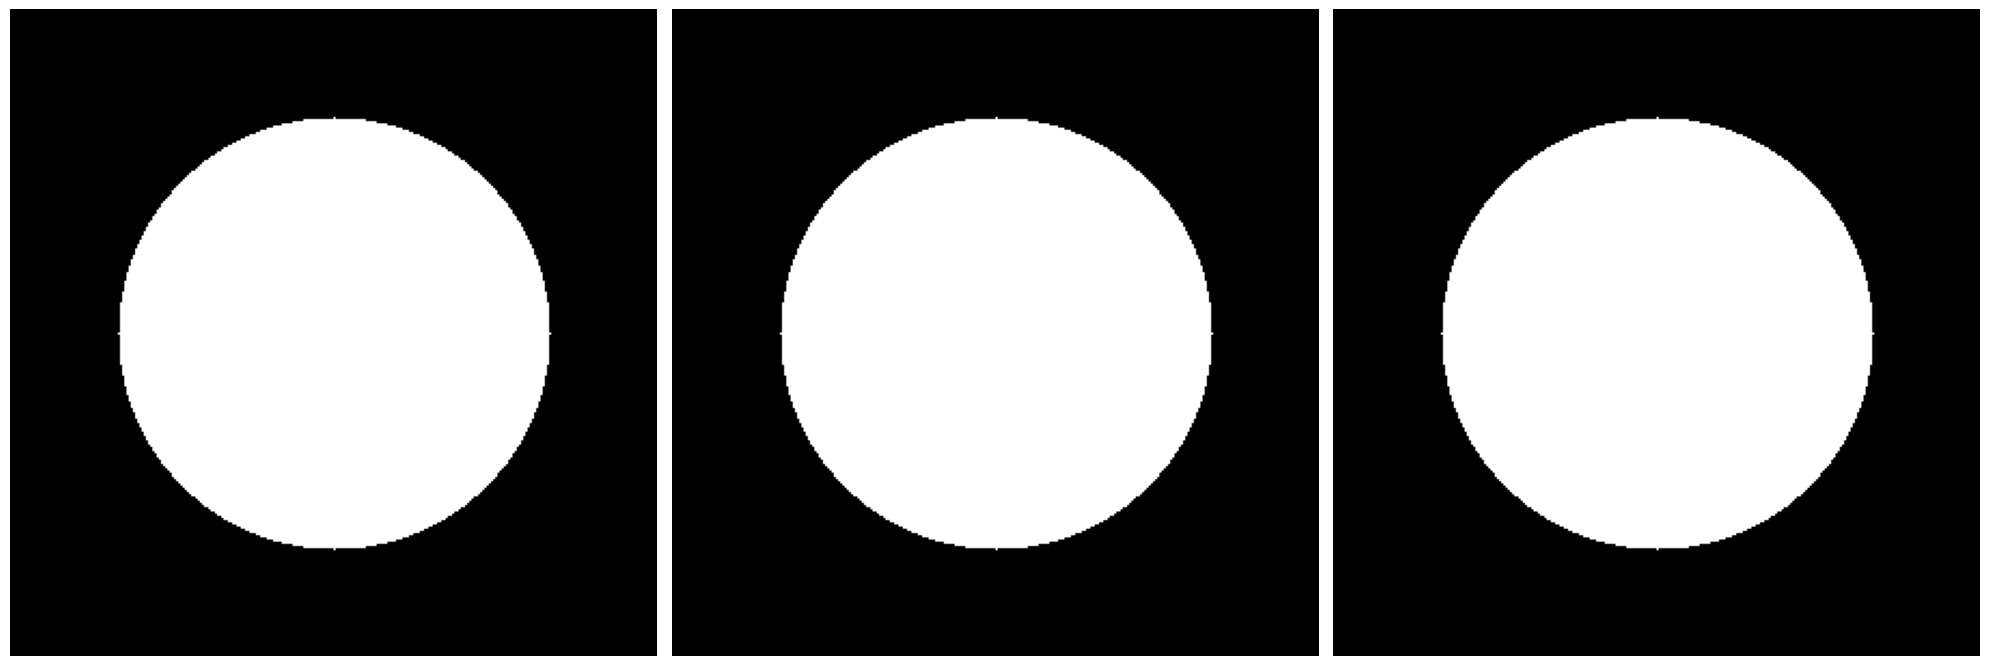

In [6]:
sphere_arr = generate_3d_sphere(size=300, radius=100)
plot_output(sphere_arr)

# Labels Color Dictionaries

In [7]:
brain_color_dict = {
    1: "#F54927",
    2: "#6CF527",
    3: "#27D3F5",
    }

abdomin_color_dict = {
    1: "#F54927",
    2: "#6CF527",
    3: "#27D3F5",
    4: "#B027F5",
    }

sphere_color_dict = {
    1: "#FF0000",
    }

# Differernt Lighting Types

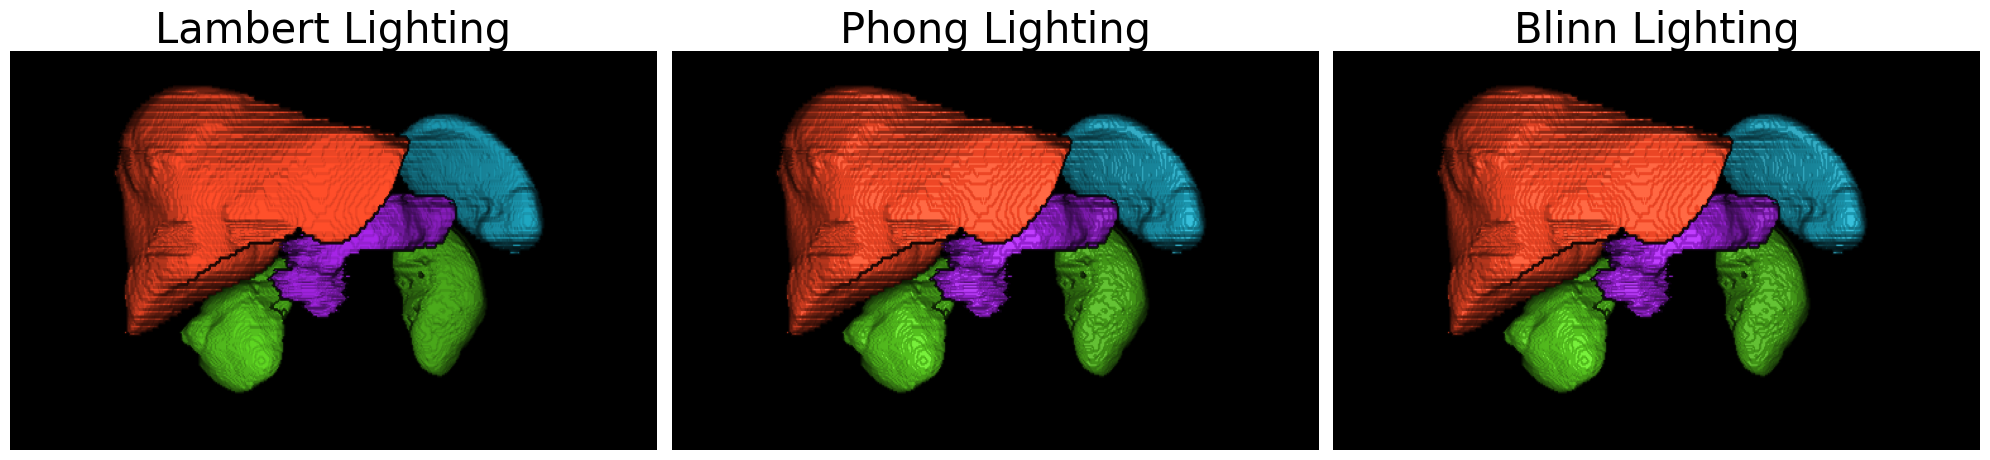

In [8]:
co_abdomin_3d_lambert = FirstHitVoxelMaskProjection(
    color_hex_dict=abdomin_color_dict,
    axis=1,
    reverse=True,
    gamma=1/2.3,
    lighting="lambert",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    )(labels_mask  = abdomin_mask_arr)

co_abdomin_3d_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=abdomin_color_dict,
    axis=1,
    reverse=True,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = abdomin_mask_arr)

co_abdomin_3d_blinn = FirstHitVoxelMaskProjection(
    color_hex_dict=abdomin_color_dict,
    axis=1,
    reverse=True,
    gamma=1/2.3,
    lighting="blinn",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = abdomin_mask_arr)

sx, sy, sz = abdomin_voxel_spacing
# --- Aspect ratios ---
aspect_xy = sy / sx
aspect_xz = sz / sx
aspect_yz = sz / sy

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rcParams["axes.titlesize"] = 30

ax[0].imshow(np.flipud(np.fliplr(co_abdomin_3d_lambert)), aspect=aspect_xz)
ax[0].set_title("Lambert Lighting")
ax[0].axis("off")

ax[1].imshow(np.flipud(np.fliplr(co_abdomin_3d_phong)), aspect=aspect_xz)
ax[1].set_title("Phong Lighting")
ax[1].axis("off")

ax[2].imshow(np.flipud(np.fliplr(co_abdomin_3d_blinn)), aspect=aspect_xz)
ax[2].set_title("Blinn Lighting")
ax[2].axis("off")

plt.tight_layout()
plt.show()

# Different Directions

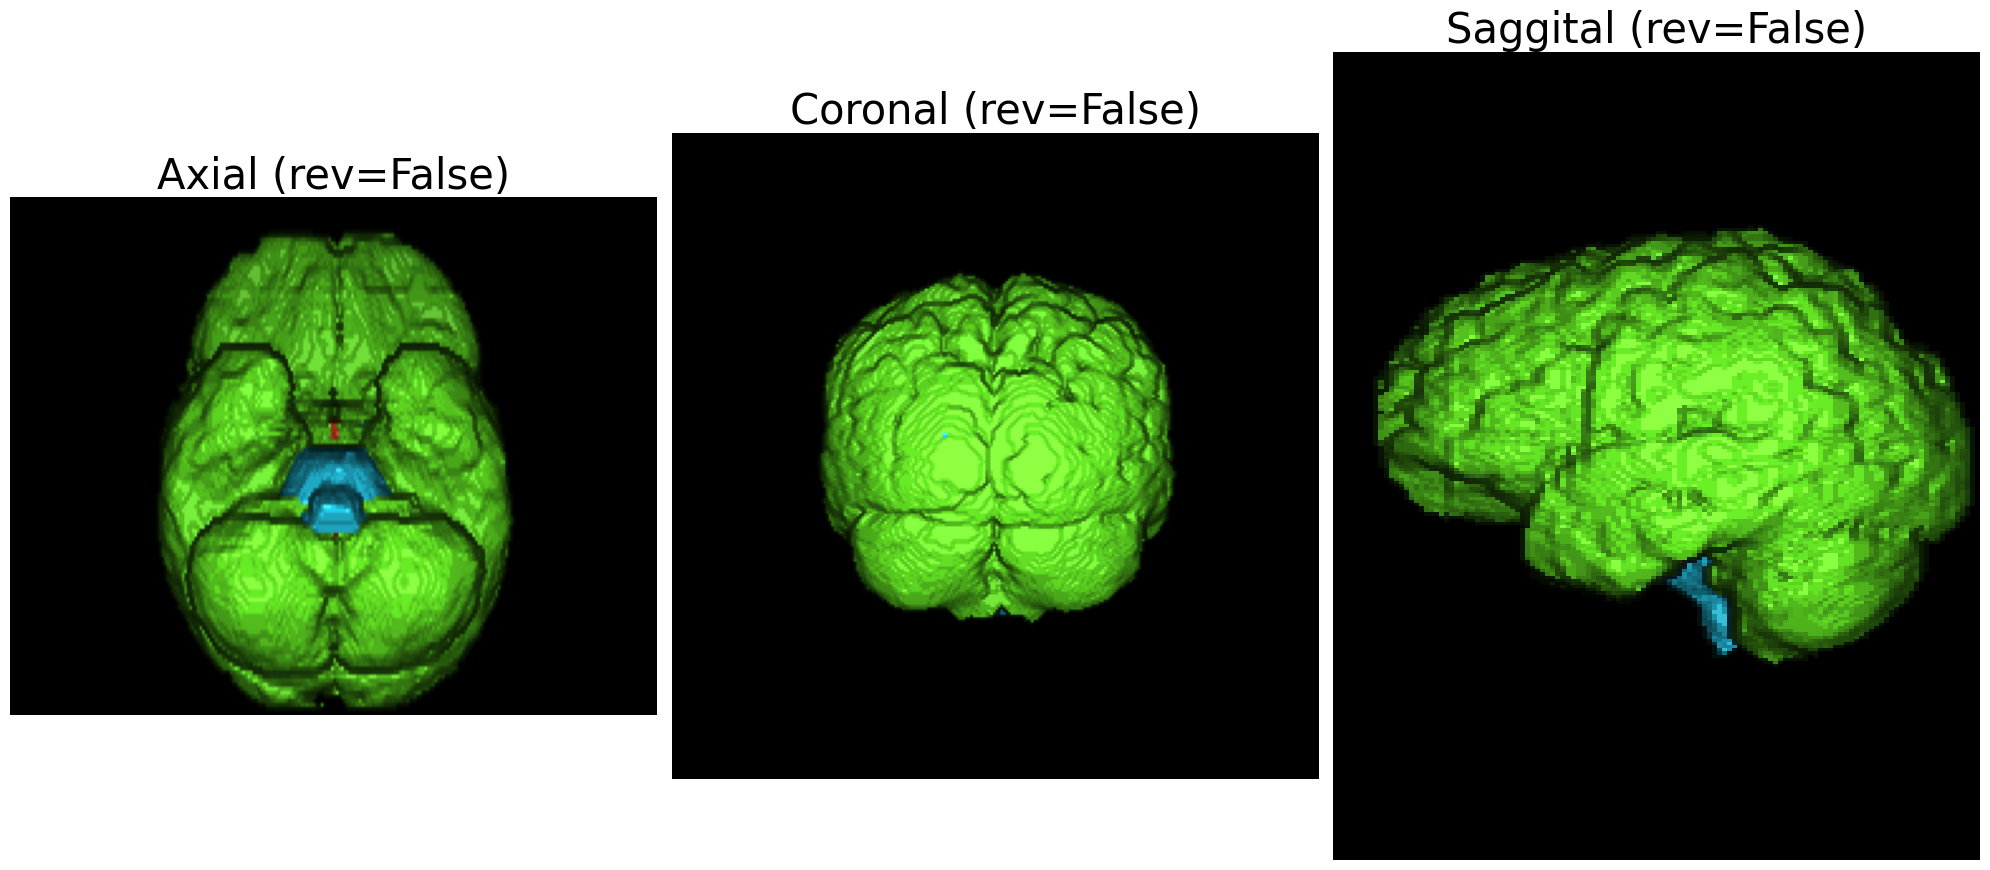

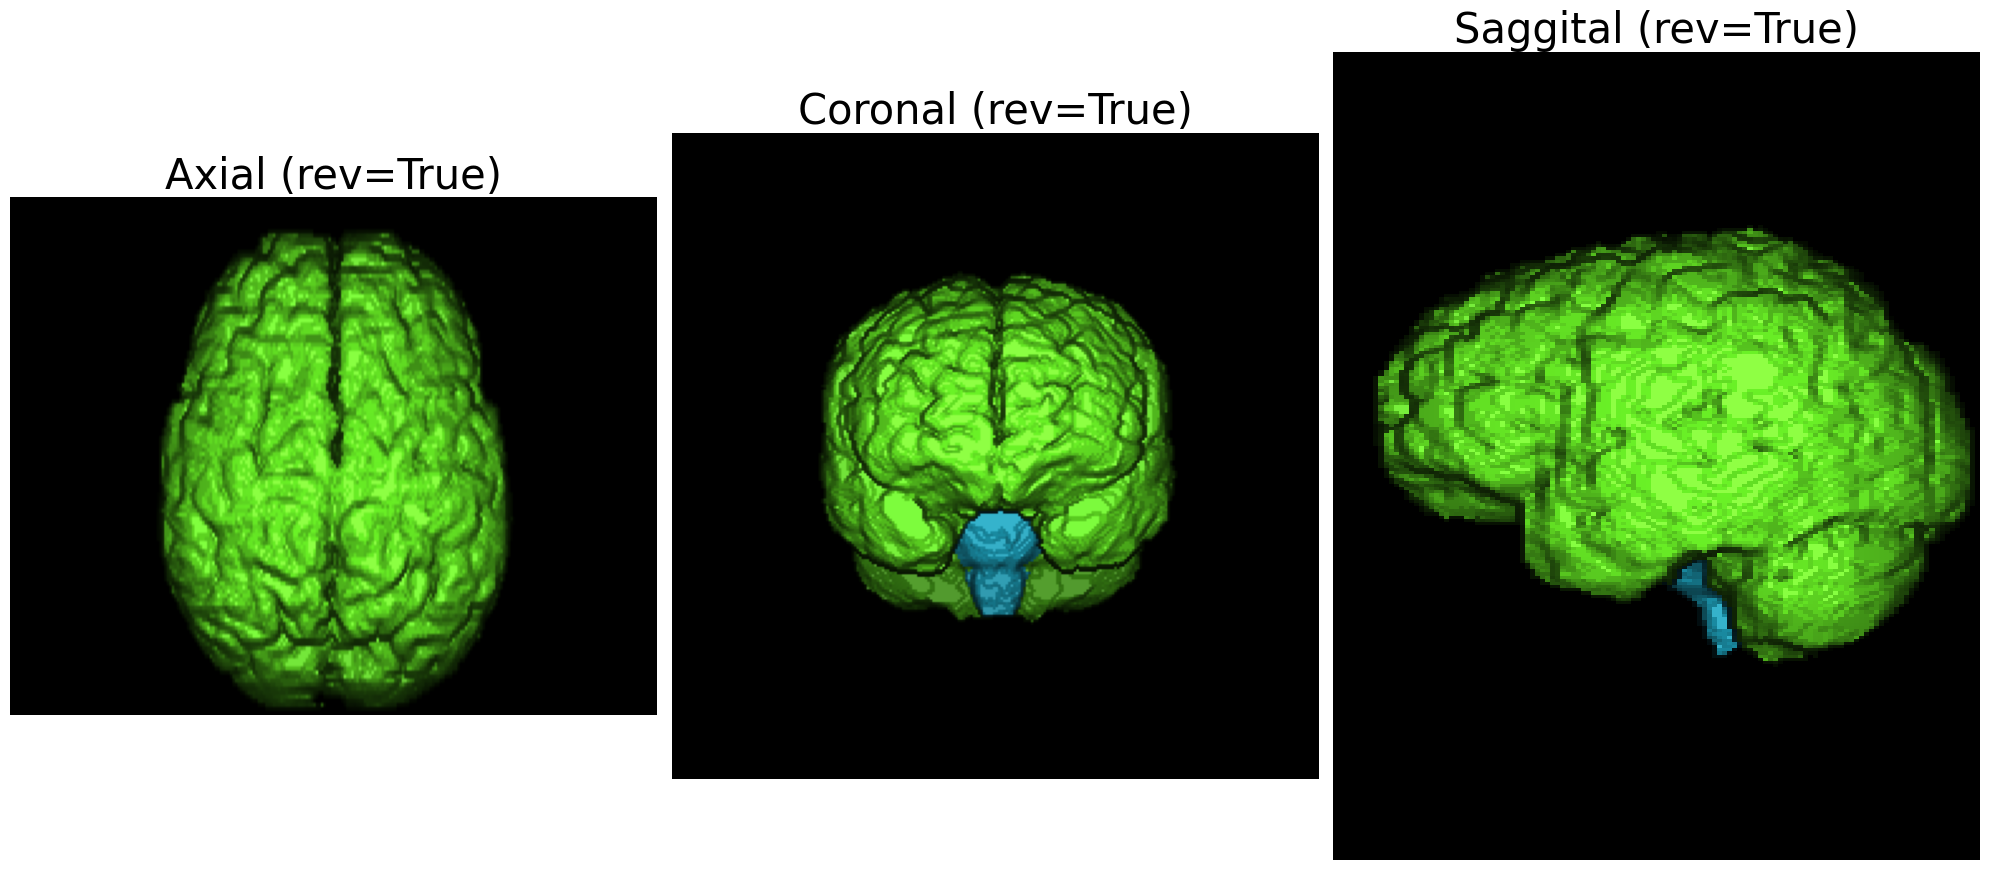

In [9]:
ax_brain_3d_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=0,
    reverse=False,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

co_brain_3d_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=1,
    reverse=False,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

sa_brain_3d_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=2,
    reverse=False,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

# Reverse direction

ax_brain_3d_rev_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=0,
    reverse=True,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

co_brain_3d_rev_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=1,
    reverse=True,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

sa_brain_3d_rev_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=2,
    reverse=True,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)

sx, sy, sz = brain_voxel_spacing
# --- Aspect ratios ---
aspect_xy = sy / sx
aspect_xz = sz / sx
aspect_yz = sz / sy

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rcParams["axes.titlesize"] = 30

ax[0].imshow(np.flipud(np.fliplr(ax_brain_3d_phong)), aspect=aspect_xy)
ax[0].set_title("Axial (rev=False)")
ax[0].axis("off")

ax[1].imshow(np.flipud(np.fliplr(co_brain_3d_phong)), aspect=aspect_xz)
ax[1].set_title("Coronal (rev=False)")
ax[1].axis("off")

ax[2].imshow(np.flipud(np.fliplr(sa_brain_3d_phong)), aspect=aspect_yz)
ax[2].set_title("Saggital (rev=False)")
ax[2].axis("off")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rcParams["axes.titlesize"] = 30

ax[0].imshow(np.flipud(np.fliplr(ax_brain_3d_rev_phong)), aspect=aspect_xy)
ax[0].set_title("Axial (rev=True)")
ax[0].axis("off")

ax[1].imshow(np.flipud(np.fliplr(co_brain_3d_rev_phong)), aspect=aspect_xz)
ax[1].set_title("Coronal (rev=True)")
ax[1].axis("off")

ax[2].imshow(np.flipud(np.fliplr(sa_brain_3d_rev_phong)), aspect=aspect_yz)
ax[2].set_title("Saggital (rev=True)")
ax[2].axis("off")

plt.tight_layout()
plt.show()

# Overlay 3D Mask on Image

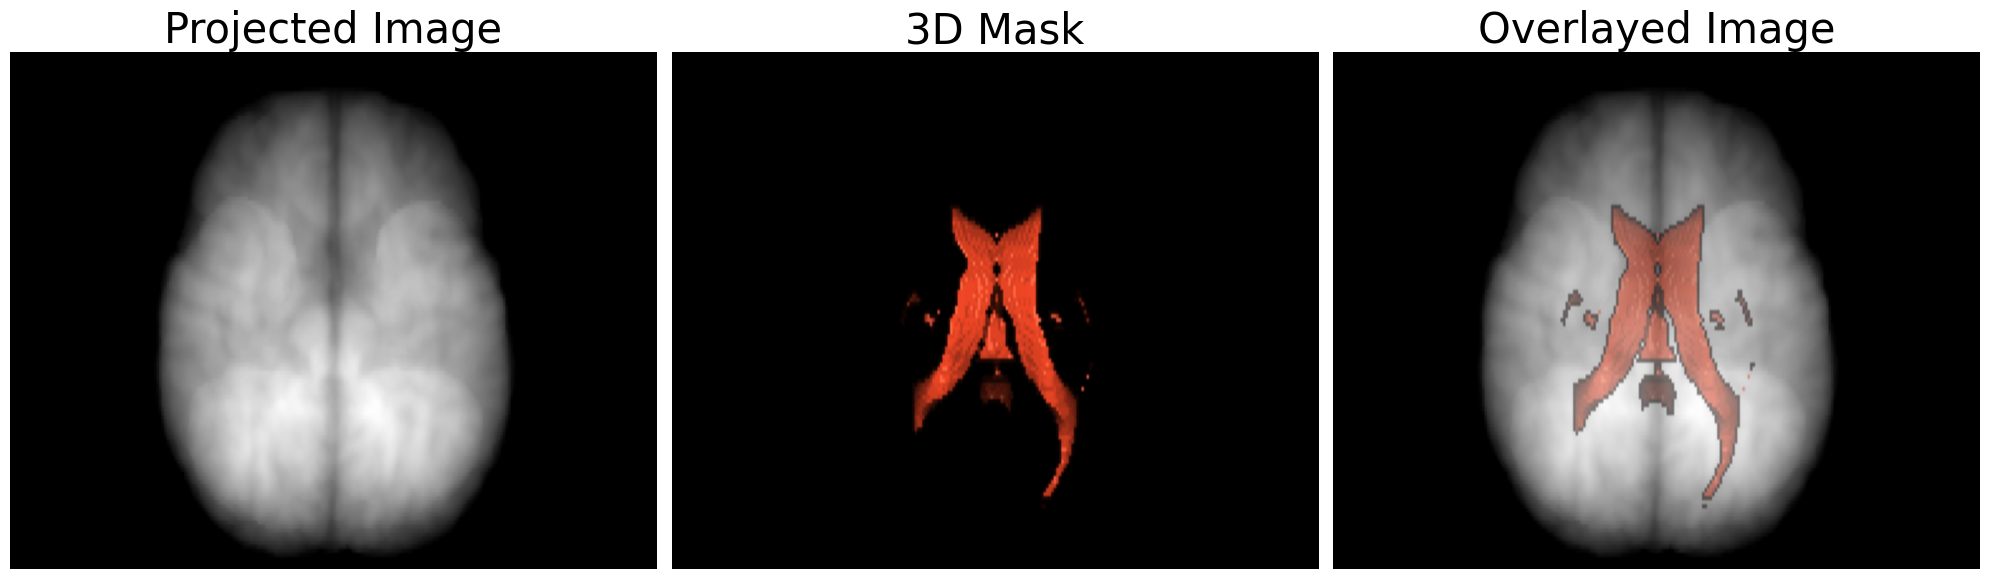

In [10]:
brain_color_dict = {
    1: "#F54927",
    }

ax_brain_csf_3d_rev_phong = FirstHitVoxelMaskProjection(
    color_hex_dict=brain_color_dict,
    axis=0,
    reverse=True,
    gamma=1/2.3,
    lighting="phong",
    light_color_hex="#FFFFFF",
    light_dir=(0, 0, 1),
    ambient=0.1,
    specular=0.1,
    shininess=40,
    )(labels_mask  = brain_mask_arr)


ax_brian_projected_image = MeanAxisProjector(axis=0, remove_negative=True)(image=t1_brain_arr)

ax_brian_overlayed_image = OverlayMasker(opacity=0.5)(image=ax_brian_projected_image, mask=ax_brain_csf_3d_rev_phong)

sx, sy, sz = brain_voxel_spacing
# --- Aspect ratios ---
aspect_xy = sy / sx
aspect_xz = sz / sx
aspect_yz = sz / sy

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rcParams["axes.titlesize"] = 30

ax[0].imshow(np.flipud(np.fliplr(ax_brian_projected_image)), aspect=aspect_xy, cmap="gray")
ax[0].set_title("Projected Image")
ax[0].axis("off")

ax[1].imshow(np.flipud(np.fliplr(ax_brain_csf_3d_rev_phong)), aspect=aspect_xy)
ax[1].set_title("3D Mask")
ax[1].axis("off")

ax[2].imshow(np.flipud(np.fliplr(ax_brian_overlayed_image)), aspect=aspect_xy)
ax[2].set_title("Overlayed Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()



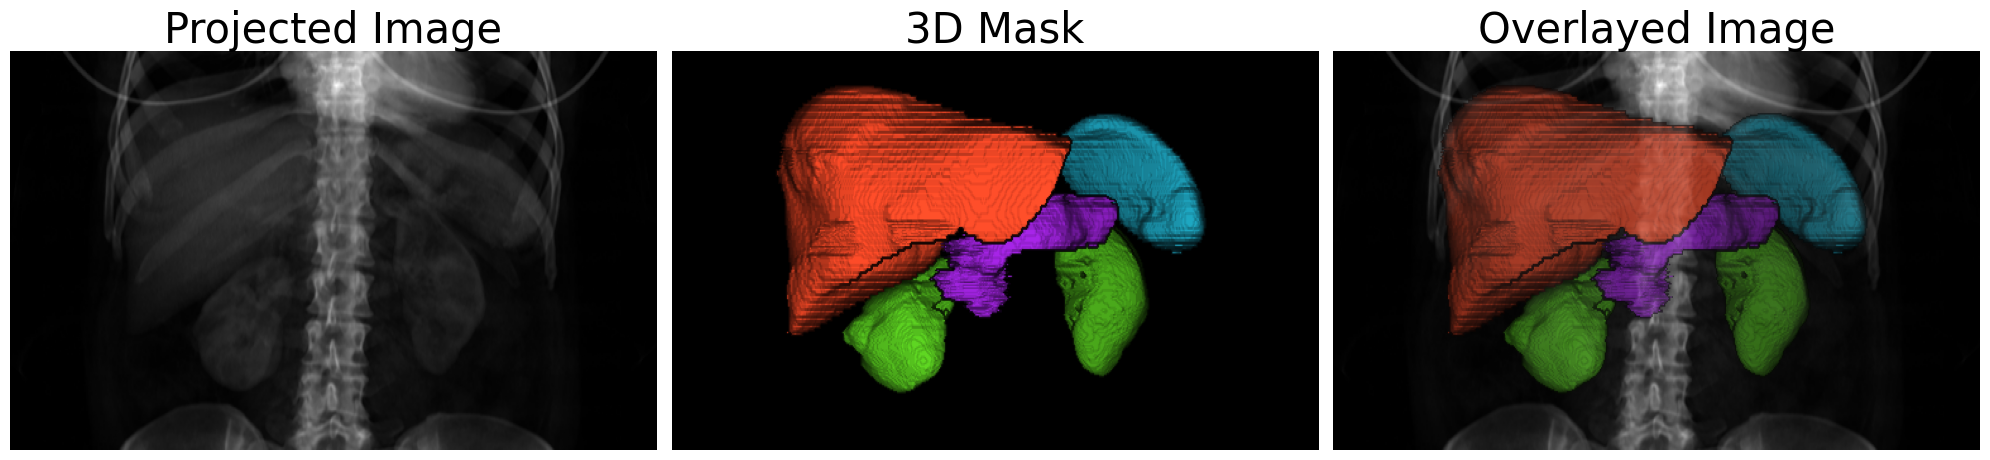

In [11]:
co_abdomin_projected_image = MeanAxisProjector(axis=1, remove_negative=True)(image=ct_abdomin_arr)

co_abdomin_overlayed_image = OverlayMasker(opacity=0.6)(image=co_abdomin_projected_image, mask=co_abdomin_3d_lambert)

sx, sy, sz = abdomin_voxel_spacing
# --- Aspect ratios ---
aspect_xy = sy / sx
aspect_xz = sz / sx
aspect_yz = sz / sy

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rcParams["axes.titlesize"] = 30

ax[0].imshow(np.flipud(np.fliplr(co_abdomin_projected_image)), aspect=aspect_xz, cmap="gray")
ax[0].set_title("Projected Image")
ax[0].axis("off")

ax[1].imshow(np.flipud(np.fliplr(co_abdomin_3d_lambert)), aspect=aspect_xz)
ax[1].set_title("3D Mask")
ax[1].axis("off")

ax[2].imshow(np.flipud(np.fliplr(co_abdomin_overlayed_image)), aspect=aspect_xz)
ax[2].set_title("Overlayed Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()